**In this project we will try to list out scammers from the data. we might face some challenges since most of the transactions will be not frauds and only .01 or 0.2% of them gonna be fake**

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [2]:
#loading the dataset of credit card details
data = pd.read_csv("creditcard.csv")

In [3]:
#Taking a look at how does our data looks
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#decsribing our data
print(data.shape)
print(data.describe())


(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [5]:
#Checking th number of fraud cases in dataset
fraud = data[data['Class']==1]
valid = data[data['Class']==0]

outlier = len(fraud)/float(len(valid))

print(outlier)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [6]:
#now print details about fraud marked transactions
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

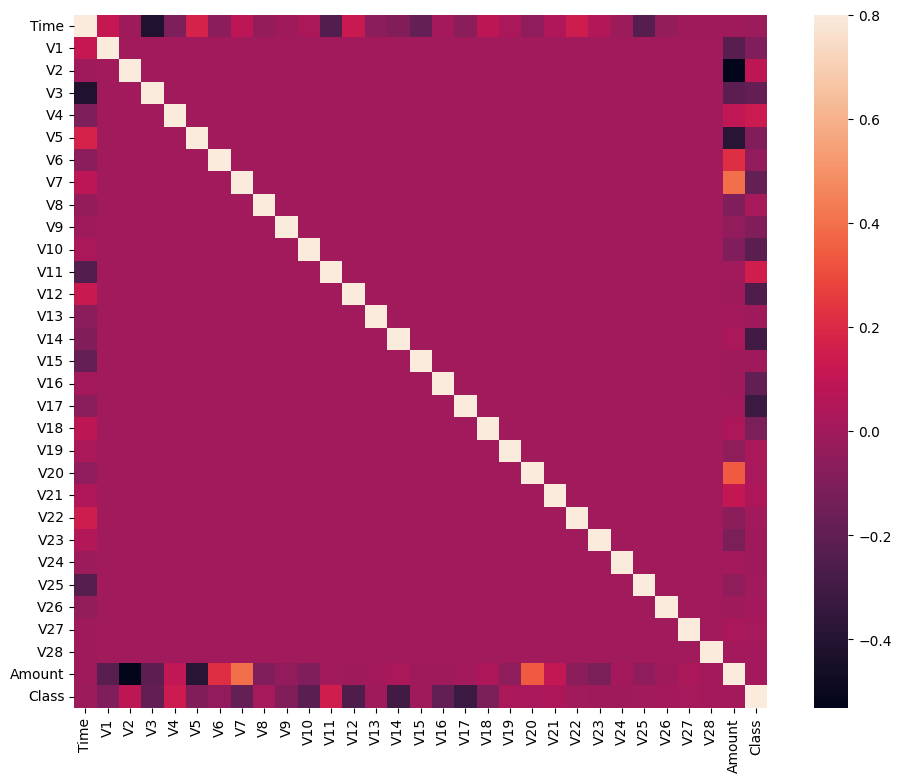

In [7]:
#plotting the correlation mattrix

corrmat = data.corr()
fig = plt.figure(figsize= (12,9))
sns.heatmap(corrmat, vmax =0.8, square = True)
plt.show

In [8]:
#separating the values of both axis

X = data.drop(['Class'], axis = 1)
Y = data["Class"]

print(X.shape)
print(Y.shape)

#now take values for next steps which includes processing

xdata = X.values
ydata = Y.values




(284807, 30)
(284807,)


In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    xdata, ydata ,test_size= 0.2, random_state = 42
)

In [10]:
#building a random forest model using scikit learn

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

ypredict = rfc.predict(xtest)

In [11]:
#creating parameters for evaluation of our model

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

noutliers = len(fraud)
nerrors = (ypredict != ytest).sum()

accuracy = accuracy_score(ytest, ypredict)
print("The accuracy is {}".format(accuracy))

precision = precision_score(ytest, ypredict)
print("The precision is {}".format(precision))

recall = recall_score(ytest, ypredict)
print("The recall is {}".format(recall))

f1 = f1_score(ytest, ypredict)
print("The f1 score is {}".format(f1))

mcc = matthews_corrcoef(ytest, ypredict)
print("The Mattews correlation coefficient is {}".format(mcc))

The accuracy is 0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The f1 score is 0.8636363636363636
The Mattews correlation coefficient is 0.8690748763736589


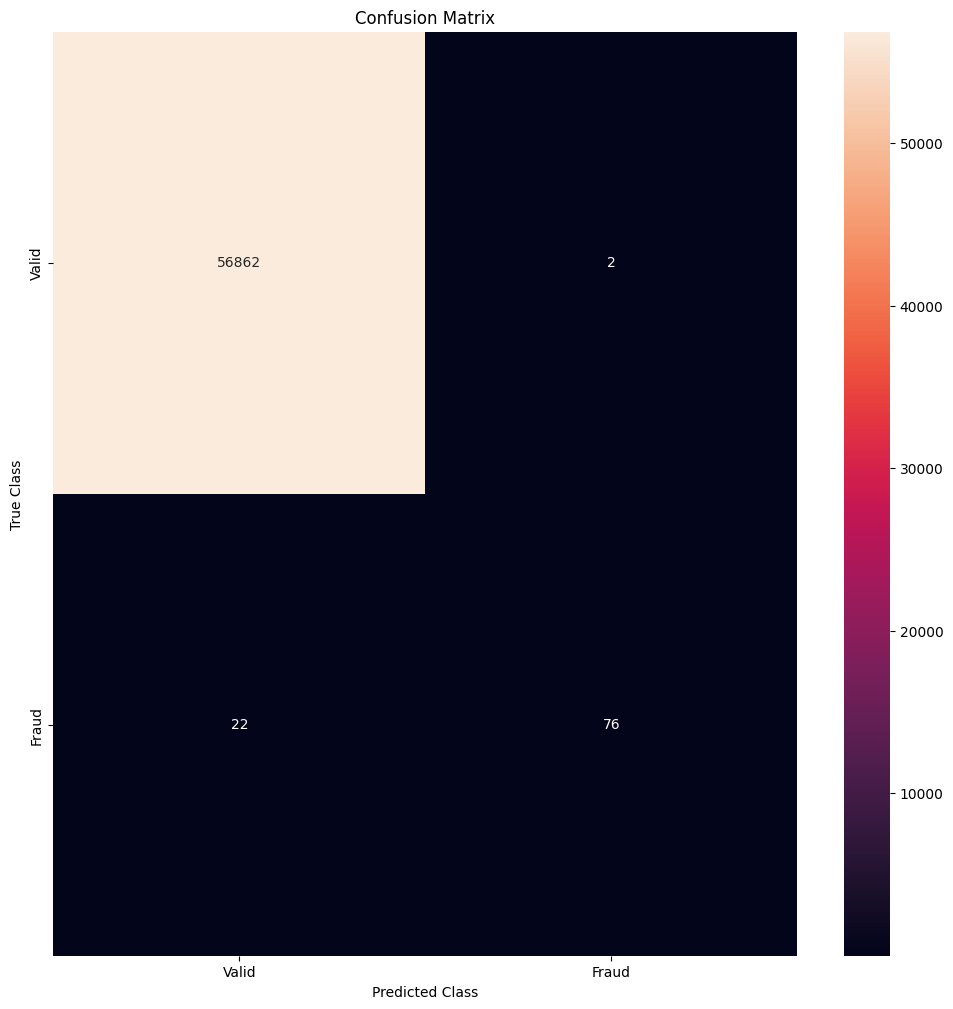

In [12]:
#Now visualizing the confusion matrix 

LABELS = ["Valid", "Fraud"]
confus_matrix = confusion_matrix(ytest, ypredict)

plt.figure(figsize= (12, 12))
sns.heatmap(confus_matrix, xticklabels= LABELS,
            yticklabels= LABELS, annot= True, fmt= "d")
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

**The confusion matrix above shows that in the left top section says the number of True Positive results, the right top shows the False Negative results, while the bottom left shows the False Positive and bottom right one shows the True Negative**